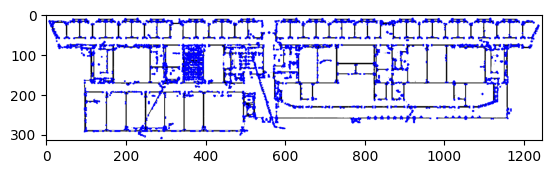

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Load image, grayscale, Gaussian blur, Otsus threshold
image = cv.imread('original_dfp/DeepFloorplan-master/output/reassembled/reassembled_E2_2.png')

# Convert image to grayscale
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and improve thresholding
blur = cv.GaussianBlur(gray, (3,3), 0)

# Apply Otsu's thresholding to convert grayscale to a binary image
# This will make walls white (255) and background black (0)
_, thresh = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Invert the binary image: walls become white (255), background becomes black (0)
inverted_thresh = cv.bitwise_not(thresh)

gray = inverted_thresh
gray = np.float32(gray)

# Harris Corner Detection
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
image[dst>0.01*dst.max()]=[0,0,255]
plt.figure()
plt.imshow(image)

/var/folders/vy/vzz9ffhn4271_bx4mb2_r42m0000gn/T/ipykernel_63611/4067225567.py:29: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


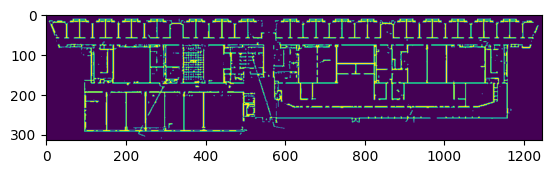

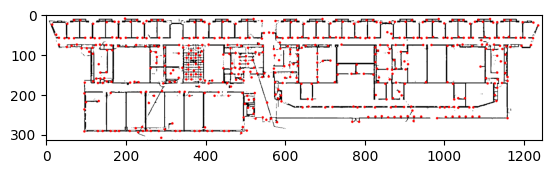

In [5]:
# Load image, grayscale, Gaussian blur, Otsus threshold
image = cv.imread('original_dfp/DeepFloorplan-master/output/reassembled/reassembled_E2_2.png')

# Convert image to grayscale
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and improve thresholding
blur = cv.GaussianBlur(gray, (3,3), 0)

# Apply Otsu's thresholding to convert grayscale to a binary image
# This will make walls white (255) and background black (0)
_, thresh = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Invert the binary image: walls become white (255), background becomes black (0)
inverted_thresh = cv.bitwise_not(thresh)

gray = inverted_thresh
gray = np.float32(gray)
plt.figure()
plt.imshow(gray)

# kernel = np.ones((5,5),np.uint8)
# gray = cv.dilate(gray,kernel,iterations = 1)
# plt.figure()
# plt.imshow(gray)

# Shi-Tomasi corner detection
corners = cv.goodFeaturesToTrack(gray,500,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(image,(x,y),3,255,-1)
plt.figure()
plt.imshow(image)
plt.show()
plt.imsave("shi_tomasi_corners.png", image)